In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# train_path = '/content/drive/MyDrive/Colab Notebooks/Cat&Dog Dataset/Training_data'
# test_path = '/content/drive/MyDrive/Colab Notebooks/Cat&Dog Dataset/Testing_data'

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    'Cat&Dog Dataset\Training_data',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'Cat&Dog Dataset\Testing_data',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)

Found 633 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [17]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [35]:
model = Sequential()

model.add(Conv2D(50, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 98, 98, 50)        1400      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 49, 49, 50)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 49, 49, 50)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 47, 47, 100)       45100     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 23, 23, 100)      0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 23, 23, 100)      

In [37]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [38]:
history = model.fit(train_generator, batch_size=16, validation_data=test_generator, epochs=50, callbacks=[early_stopping])

Epoch 1/50
20/20 [==============================] - 11s 476ms/step - loss: 0.7179 - accuracy: 0.5861 - val_loss: 0.7046 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 9s 456ms/step - loss: 0.6722 - accuracy: 0.6066 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 10s 478ms/step - loss: 0.6601 - accuracy: 0.6066 - val_loss: 0.6875 - val_accuracy: 0.5000
Epoch 4/50
20/20 [==============================] - 9s 458ms/step - loss: 0.6535 - accuracy: 0.6066 - val_loss: 0.6804 - val_accuracy: 0.5000
Epoch 5/50
20/20 [==============================] - 9s 429ms/step - loss: 0.6375 - accuracy: 0.6066 - val_loss: 0.6712 - val_accuracy: 0.5000
Epoch 6/50
20/20 [==============================] - 10s 486ms/step - loss: 0.6307 - accuracy: 0.6066 - val_loss: 0.6815 - val_accuracy: 0.5000
Epoch 7/50
20/20 [==============================] - 9s 457ms/step - loss: 0.6747 - accuracy: 0.6066 - val_loss: 0.6839 - val_accuracy: 0.5000
Epo

In [39]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)

7/7 [==============================] - 1s 77ms/step - loss: 0.5746 - accuracy: 0.7200
Test accuracy: 0.7200000286102295


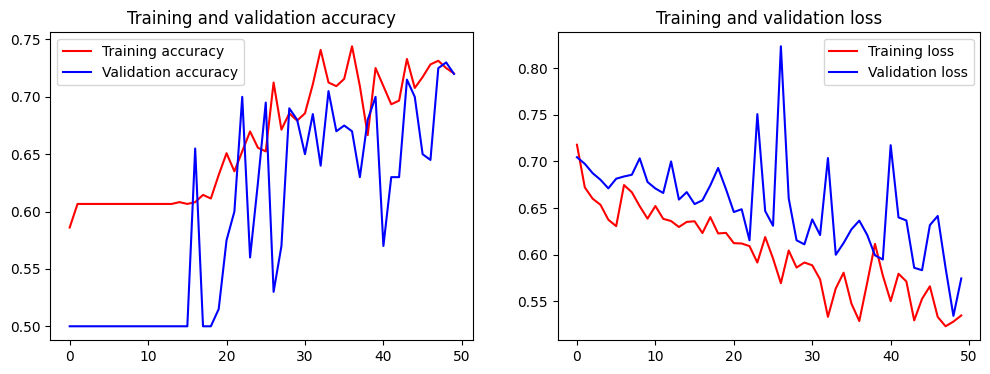

In [40]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()